In [137]:
#pip install numpy

In [138]:
#pip install pandas

In [139]:
#pip install seaborn

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load and Inspect the Data

In [141]:
data=pd.read_csv("unique_poor_quality_data.csv")
data.sample(7)

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
1202,30,70000.0,NaN,New York,4bhk,8GB,800,Yes,Divorced,NaN,Unemployed,50000,Very High,No,Yes
1447,45,NaN,NaN,Los Angeles,1BHK,NaN,300,Yes,NaN,NaN,NaN,20000,Low,No,Yes
867,28,90000.0,Male,NaN,4bhk,8GB,NaN,Yes,NaN,NaN,Unemployed,10000,NaN,No,NaN
1243,40,80000.0,Male,New York,Studio,6GB,600,Yes,Married,1.0,Business,10000,Very High,No,No
365,NaN,90000.0,Female,Los Angeles,Studio,NaN,600,Yes,NaN,NaN,Self-Employed,20000,Very High,No,No
1704,Unknown,NaN,F,New York,1BHK,2GB,300,Yes,Single,NaN,Self-Employed,10000,NaN,No,No
1283,40,60000.0,NaN,Los Angeles,1BHK,2GB,600,Yes,Married,3.0,Salaried,NaN,Medium,No,No


In [142]:
r,c=data.shape
print(f'Number of Rows is {r} \nNumber of Columns is {c}')

Number of Rows is 2505 
Number of Columns is 15


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1902 non-null   object 
 1   Salary           2088 non-null   float64
 2   Gender           1997 non-null   object 
 3   Location         2236 non-null   object 
 4   Property_Type    2505 non-null   object 
 5   RAM              1992 non-null   object 
 6   Credit_Score     2069 non-null   object 
 7   Churn            2505 non-null   object 
 8   Marital_Status   1987 non-null   object 
 9   Dependents       1663 non-null   float64
 10  Employment_Type  2002 non-null   object 
 11  Loan_Amount      2154 non-null   object 
 12  Internet_Usage   2015 non-null   object 
 13  Fraud_Suspected  2505 non-null   object 
 14  Approved_Loan    1725 non-null   object 
dtypes: float64(2), object(13)
memory usage: 293.7+ KB


In [144]:
data.columns

Index(['Age', 'Salary', 'Gender', 'Location', 'Property_Type', 'RAM',
       'Credit_Score', 'Churn', 'Marital_Status', 'Dependents',
       'Employment_Type', 'Loan_Amount', 'Internet_Usage', 'Fraud_Suspected',
       'Approved_Loan'],
      dtype='object')

In [145]:
data.describe()

,Salary,Dependents
count,2.088000e+03,1663.000000
mean,3.719444e+05,1.509321
std,9.467111e+05,1.128774
min,5.000000e+04,0.000000
25%,7.000000e+04,0.000000
50%,8.000000e+04,2.000000
75%,9.000000e+04,3.000000
max,3.500000e+07,3.000000


### Check for missing values

In [146]:
print(data.columns[data.isna().any()].tolist())

['Age', 'Salary', 'Gender', 'Location', 'RAM', 'Credit_Score', 'Marital_Status', 'Dependents', 'Employment_Type', 'Loan_Amount', 'Internet_Usage', 'Approved_Loan']


In [147]:
data.isnull().sum()

Age                603
Salary             417
Gender             508
Location           269
Property_Type        0
RAM                513
Credit_Score       436
Churn                0
Marital_Status     518
Dependents         842
Employment_Type    503
Loan_Amount        351
Internet_Usage     490
Fraud_Suspected      0
Approved_Loan      780
dtype: int64

In [148]:
# from sklearn.impute import SimpleImputer
# imputer_mean = SimpleImputer(strategy="mean")
# imputer_median = SimpleImputer(strategy="median")
# imputer_mode = SimpleImputer(strategy="mode")

#imputed_data = imputer.fit_transform(data)

### Identify data types and Handle inconsistencies.


In [149]:
gender_counts = data['Gender'].value_counts()
gender_counts

Gender
Male      840
F         307
Other     306
Female    303
M         241
Name: count, dtype: int64

In [150]:
def setGenderColumns(gender):
    if(gender == 'Female'):
        return 'F'
    elif(gender == 'Male'):
        return 'M'
    else:
        return gender


In [151]:
data["Gender"] = data["Gender"].apply(setGenderColumns)
data

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30,1500000.0,M,Los Angeles,3BHK,NaN,400,Yes,Widowed,NaN,Salaried,NaN,Low,No,No
1,Unknown,70000.0,F,New York,Studio,2GB,400,Yes,NaN,NaN,NaN,10000,Low,No,No
2,NaN,1500000.0,F,Chicago,2BHK,2GB,NaN,Yes,Divorced,3.0,Salaried,5000,Medium,No,Yes
3,Unknown,60000.0,NaN,New York,Studio,2GB,300,Yes,NaN,0.0,Business,5000,Low,No,NaN
4,NaN,80000.0,F,Los Angeles,1BHK,2GB,700,Yes,NaN,NaN,Self-Employed,Unknown,NaN,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,NaN,60000.0,M,Chicago,4bhk,NaN,700,Yes,Widowed,3.0,Unemployed,150000,NaN,No,NaN
2501,45,60000.0,NaN,New York,Studio,NaN,700,Yes,Single,0.0,Business,5000,High,No,Yes
2502,30,60000.0,M,Chicago,2BHK,4GB,400,Yes,Divorced,2.0,NaN,NaN,Medium,No,Yes
2503,Unknown,1500000.0,NaN,Chicago,1BHK,8GB,NaN,Yes,Widowed,NaN,Self-Employed,NaN,High,No,No


In [152]:
Property_Type_counts = data['Property_Type'].value_counts()
Property_Type_counts

Property_Type
3BHK      681
Studio    665
2BHK      491
4bhk      351
1BHK      317
Name: count, dtype: int64

In [153]:
def setPropertyTypeColumns(Property):
    if(Property=="Studio"):
        return 0.5
    else:
        return Property[0]
    



In [154]:
data["Property_Type"] = data["Property_Type"].apply(setPropertyTypeColumns)
data

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30,1500000.0,M,Los Angeles,3,NaN,400,Yes,Widowed,NaN,Salaried,NaN,Low,No,No
1,Unknown,70000.0,F,New York,0.5,2GB,400,Yes,NaN,NaN,NaN,10000,Low,No,No
2,NaN,1500000.0,F,Chicago,2,2GB,NaN,Yes,Divorced,3.0,Salaried,5000,Medium,No,Yes
3,Unknown,60000.0,NaN,New York,0.5,2GB,300,Yes,NaN,0.0,Business,5000,Low,No,NaN
4,NaN,80000.0,F,Los Angeles,1,2GB,700,Yes,NaN,NaN,Self-Employed,Unknown,NaN,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,NaN,60000.0,M,Chicago,4,NaN,700,Yes,Widowed,3.0,Unemployed,150000,NaN,No,NaN
2501,45,60000.0,NaN,New York,0.5,NaN,700,Yes,Single,0.0,Business,5000,High,No,Yes
2502,30,60000.0,M,Chicago,2,4GB,400,Yes,Divorced,2.0,NaN,NaN,Medium,No,Yes
2503,Unknown,1500000.0,NaN,Chicago,1,8GB,NaN,Yes,Widowed,NaN,Self-Employed,NaN,High,No,No


In [155]:
RAM_counts = data['RAM'].value_counts()
RAM_counts

RAM
8GB     562
2GB     526
16GB    406
32GB    246
6GB     155
4GB      97
Name: count, dtype: int64

In [156]:
def setRAMColumns(RAM):
    if isinstance(RAM, str):  
        number_part = ''.join([char for char in RAM if char.isdigit()])
        return number_part
    else:
        return RAM

In [157]:
data["RAM"] = data["RAM"].apply(setRAMColumns)
data

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30,1500000.0,M,Los Angeles,3,NaN,400,Yes,Widowed,NaN,Salaried,NaN,Low,No,No
1,Unknown,70000.0,F,New York,0.5,2,400,Yes,NaN,NaN,NaN,10000,Low,No,No
2,NaN,1500000.0,F,Chicago,2,2,NaN,Yes,Divorced,3.0,Salaried,5000,Medium,No,Yes
3,Unknown,60000.0,NaN,New York,0.5,2,300,Yes,NaN,0.0,Business,5000,Low,No,NaN
4,NaN,80000.0,F,Los Angeles,1,2,700,Yes,NaN,NaN,Self-Employed,Unknown,NaN,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,NaN,60000.0,M,Chicago,4,NaN,700,Yes,Widowed,3.0,Unemployed,150000,NaN,No,NaN
2501,45,60000.0,NaN,New York,0.5,NaN,700,Yes,Single,0.0,Business,5000,High,No,Yes
2502,30,60000.0,M,Chicago,2,4,400,Yes,Divorced,2.0,NaN,NaN,Medium,No,Yes
2503,Unknown,1500000.0,NaN,Chicago,1,8,NaN,Yes,Widowed,NaN,Self-Employed,NaN,High,No,No


In [158]:
Credit_Score_counts = data['Credit_Score'].value_counts()
Credit_Score_counts

Credit_Score
700               331
400               329
600               265
Excellent         261
Poor              260
300               242
500               221
800               159
CorruptedEntry      1
Name: count, dtype: int64

In [159]:
def setCredit_ScoreColumns(Credit_Score):
    if isinstance(Credit_Score, str): 
        if(Credit_Score=='Excellent'):
            return 650
        elif(Credit_Score=='Poor'):
            return 250
        elif(Credit_Score == 'CorruptedEntry'):
            return None 
        else:
            return Credit_Score
    else:
        return Credit_Score

In [160]:
data["Credit_Score"] = data["Credit_Score"].apply(setCredit_ScoreColumns)
data

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30,1500000.0,M,Los Angeles,3,NaN,400,Yes,Widowed,NaN,Salaried,NaN,Low,No,No
1,Unknown,70000.0,F,New York,0.5,2,400,Yes,NaN,NaN,NaN,10000,Low,No,No
2,NaN,1500000.0,F,Chicago,2,2,NaN,Yes,Divorced,3.0,Salaried,5000,Medium,No,Yes
3,Unknown,60000.0,NaN,New York,0.5,2,300,Yes,NaN,0.0,Business,5000,Low,No,NaN
4,NaN,80000.0,F,Los Angeles,1,2,700,Yes,NaN,NaN,Self-Employed,Unknown,NaN,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,NaN,60000.0,M,Chicago,4,NaN,700,Yes,Widowed,3.0,Unemployed,150000,NaN,No,NaN
2501,45,60000.0,NaN,New York,0.5,NaN,700,Yes,Single,0.0,Business,5000,High,No,Yes
2502,30,60000.0,M,Chicago,2,4,400,Yes,Divorced,2.0,NaN,NaN,Medium,No,Yes
2503,Unknown,1500000.0,NaN,Chicago,1,8,NaN,Yes,Widowed,NaN,Self-Employed,NaN,High,No,No


In [161]:
data= data.dropna(subset=["Approved_Loan"])
data["Approved_Loan"]

0        No
1        No
2       Yes
4       Yes
5        No
       ... 
2499    Yes
2501    Yes
2502    Yes
2503     No
2504     No
Name: Approved_Loan, Length: 1725, dtype: object

In [162]:
for i in ["Age","Loan_Amount","Property_Type","RAM","Credit_Score"]:
    data[i] = pd.to_numeric(data[i], errors='coerce')
data

/tmp/ipykernel_986/1228718731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.to_numeric(data[i], errors='coerce')


,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30.0,1500000.0,M,Los Angeles,3.0,NaN,400.0,Yes,Widowed,NaN,Salaried,NaN,Low,No,No
1,NaN,70000.0,F,New York,0.5,2.0,400.0,Yes,NaN,NaN,NaN,10000.0,Low,No,No
2,NaN,1500000.0,F,Chicago,2.0,2.0,NaN,Yes,Divorced,3.0,Salaried,5000.0,Medium,No,Yes
4,NaN,80000.0,F,Los Angeles,1.0,2.0,700.0,Yes,NaN,NaN,Self-Employed,NaN,NaN,No,Yes
5,NaN,60000.0,M,New York,0.5,32.0,400.0,Yes,Married,1.0,Self-Employed,20000.0,Very High,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NaN,90000.0,M,Chicago,1.0,16.0,650.0,Yes,NaN,NaN,Self-Employed,50000.0,Low,No,Yes
2501,45.0,60000.0,NaN,New York,0.5,NaN,700.0,Yes,Single,0.0,Business,5000.0,High,No,Yes
2502,30.0,60000.0,M,Chicago,2.0,4.0,400.0,Yes,Divorced,2.0,NaN,NaN,Medium,No,Yes
2503,NaN,1500000.0,NaN,Chicago,1.0,8.0,NaN,Yes,Widowed,NaN,Self-Employed,NaN,High,No,No


In [163]:
for i in ["Age","Loan_Amount","Salary","Property_Type","RAM","Credit_Score","Dependents","Loan_Amount"]:
    data[i]=data[i].fillna(data[i].mean())
data

/tmp/ipykernel_986/3094365688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].fillna(data[i].mean())


,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30.000000,1500000.0,M,Los Angeles,3.0,10.77971,400.000000,Yes,Widowed,1.525719,Salaried,45554.20712,Low,No,No
1,32.070244,70000.0,F,New York,0.5,2.00000,400.000000,Yes,NaN,1.525719,NaN,10000.00000,Low,No,No
2,32.070244,1500000.0,F,Chicago,2.0,2.00000,522.475456,Yes,Divorced,3.000000,Salaried,5000.00000,Medium,No,Yes
4,32.070244,80000.0,F,Los Angeles,1.0,2.00000,700.000000,Yes,NaN,1.525719,Self-Employed,45554.20712,NaN,No,Yes
5,32.070244,60000.0,M,New York,0.5,32.00000,400.000000,Yes,Married,1.000000,Self-Employed,20000.00000,Very High,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,32.070244,90000.0,M,Chicago,1.0,16.00000,650.000000,Yes,NaN,1.525719,Self-Employed,50000.00000,Low,No,Yes
2501,45.000000,60000.0,NaN,New York,0.5,10.77971,700.000000,Yes,Single,0.000000,Business,5000.00000,High,No,Yes
2502,30.000000,60000.0,M,Chicago,2.0,4.00000,400.000000,Yes,Divorced,2.000000,NaN,45554.20712,Medium,No,Yes
2503,32.070244,1500000.0,NaN,Chicago,1.0,8.00000,522.475456,Yes,Widowed,1.525719,Self-Employed,45554.20712,High,No,No


In [164]:
for i in ["Gender","Location","Marital_Status","Employment_Type","Internet_Usage","Fraud_Suspected"]:
    data[i]=data[i].fillna(data[i].mode()[0])
    
data

/tmp/ipykernel_986/1023697398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].fillna(data[i].mode()[0])


,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
0,30.000000,1500000.0,M,Los Angeles,3.0,10.77971,400.000000,Yes,Widowed,1.525719,Salaried,45554.20712,Low,No,No
1,32.070244,70000.0,F,New York,0.5,2.00000,400.000000,Yes,Widowed,1.525719,Self-Employed,10000.00000,Low,No,No
2,32.070244,1500000.0,F,Chicago,2.0,2.00000,522.475456,Yes,Divorced,3.000000,Salaried,5000.00000,Medium,No,Yes
4,32.070244,80000.0,F,Los Angeles,1.0,2.00000,700.000000,Yes,Widowed,1.525719,Self-Employed,45554.20712,Very High,No,Yes
5,32.070244,60000.0,M,New York,0.5,32.00000,400.000000,Yes,Married,1.000000,Self-Employed,20000.00000,Very High,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,32.070244,90000.0,M,Chicago,1.0,16.00000,650.000000,Yes,Widowed,1.525719,Self-Employed,50000.00000,Low,No,Yes
2501,45.000000,60000.0,M,New York,0.5,10.77971,700.000000,Yes,Single,0.000000,Business,5000.00000,High,No,Yes
2502,30.000000,60000.0,M,Chicago,2.0,4.00000,400.000000,Yes,Divorced,2.000000,Self-Employed,45554.20712,Medium,No,Yes
2503,32.070244,1500000.0,M,Chicago,1.0,8.00000,522.475456,Yes,Widowed,1.525719,Self-Employed,45554.20712,High,No,No


### Detect and Handle Duplicates


In [165]:
duplicate = data[data.duplicated()]
duplicate

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
2501,45.000000,60000.0,M,New York,0.5,10.77971,700.000000,Yes,Single,0.000000,Business,5000.00000,High,No,Yes
2502,30.000000,60000.0,M,Chicago,2.0,4.00000,400.000000,Yes,Divorced,2.000000,Self-Employed,45554.20712,Medium,No,Yes
2503,32.070244,1500000.0,M,Chicago,1.0,8.00000,522.475456,Yes,Widowed,1.525719,Self-Employed,45554.20712,High,No,No
2504,32.070244,90000.0,F,New York,4.0,8.00000,250.000000,Yes,Divorced,1.525719,Self-Employed,10000.00000,Low,No,No


In [166]:
data.drop_duplicates(inplace=True)

/tmp/ipykernel_986/2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


### Apply normalization (Min-Max Scaling)

In [167]:
for i in ["Age","Loan_Amount","Salary","Property_Type","RAM","Credit_Score","Dependents","Loan_Amount"]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

print("\nFinal Processed Data:\n", )
data.sample(8)


Final Processed Data:



/tmp/ipykernel_986/69472150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())


,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
1785,0.773162,0.001144,M,New York,0.000000,0.000000,0.454545,Yes,Married,0.333333,Salaried,0.000000,High,No,Yes
1720,0.736842,0.000858,M,New York,0.714286,0.292657,0.090909,Yes,Widowed,1.000000,Self-Employed,0.000000,High,No,Yes
637,1.000000,0.001144,Other,New York,0.142857,0.292657,0.000000,Yes,Widowed,0.333333,Salaried,0.279684,Very High,No,No
462,0.701754,0.009411,M,New York,0.428571,0.200000,0.090909,Yes,Widowed,0.666667,Self-Employed,0.103448,Very High,No,No
1589,0.824561,0.009411,F,New York,0.428571,0.292657,0.818182,Yes,Widowed,0.666667,Business,0.279684,High,No,Yes
2008,0.736842,0.001144,F,New York,0.000000,0.000000,0.818182,Yes,Married,0.000000,Business,0.279684,High,No,Yes
1051,0.773162,0.041488,M,Los Angeles,0.428571,0.466667,0.495410,Yes,Widowed,0.508573,Salaried,1.000000,Low,No,Yes
2168,0.773162,0.000858,F,New York,0.428571,0.292657,0.495410,Yes,Divorced,0.508573,Self-Employed,0.000000,Very High,No,Yes


### Handle Anomalies and Outliers


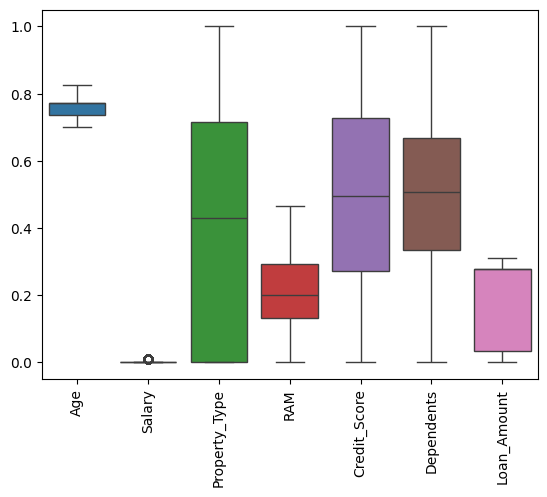

In [171]:
dataInd=data.drop("Approved_Loan",axis=1)
sns.boxplot(dataInd)
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [169]:
for i in ["Age","Loan_Amount","Salary","Property_Type","RAM","Credit_Score","Dependents","Loan_Amount"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print("outliers in ", i )
    print(outliers)
    data[i] = np.where((data[i] < lower_bound) | (data[i] > upper_bound), data[i].median(), data[i])

print("\nFinal Processed Data:\n", )
data.sample(8)

outliers in  Age
           Age    Salary Gender     Location  Property_Type       RAM  \
6     0.649123  0.000858      M     New York       0.000000  0.133333   
11    0.649123  0.000572      M     New York       0.428571  0.466667   
14    0.912281  0.041488      M     New York       0.428571  0.292657   
18    1.000000  0.000572      M      Chicago       0.000000  0.292657   
24    1.000000  0.001144  Other     New York       0.142857  1.000000   
...        ...       ...    ...          ...            ...       ...   
2476  0.912281  0.041488      M      Chicago       0.000000  0.200000   
2486  1.000000  0.001144      M     New York       0.142857  1.000000   
2489  0.912281  0.009411  Other  Los Angeles       0.142857  0.200000   
2493  0.912281  0.001144      M      Chicago       0.714286  0.200000   
2494  0.912281  0.001144      F  Los Angeles       0.142857  0.292657   

      Credit_Score Churn Marital_Status  Dependents Employment_Type  \
6         0.818182   Yes       Divo

/tmp/ipykernel_986/1901143106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where((data[i] < lower_bound) | (data[i] > upper_bound), data[i].median(), data[i])
/tmp/ipykernel_986/1901143106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where((data[i] < lower_bound) | (data[i] > upper_bound), data[i].median(), data[i])
/tmp/ipykernel_986/1901143106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,Age,Salary,Gender,Location,Property_Type,RAM,Credit_Score,Churn,Marital_Status,Dependents,Employment_Type,Loan_Amount,Internet_Usage,Fraud_Suspected,Approved_Loan
1108,0.773162,0.001144,F,Los Angeles,0.714286,0.066667,0.272727,Yes,Divorced,0.000000,Business,0.103448,Medium,No,Yes
1591,0.773162,0.009411,F,Chicago,0.000000,0.200000,0.272727,Yes,Single,0.508573,Self-Employed,0.279684,High,No,Yes
1272,0.736842,0.000572,M,New York,0.714286,0.200000,0.272727,Yes,Single,1.000000,Self-Employed,0.279684,Medium,No,Yes
2232,0.824561,0.000572,M,Los Angeles,0.428571,0.200000,0.495410,Yes,Widowed,1.000000,Self-Employed,0.103448,Very High,No,Yes
962,0.701754,0.001144,M,Chicago,0.000000,0.200000,0.495410,Yes,Married,0.000000,Self-Employed,0.279684,High,No,Yes
2379,0.773162,0.000572,M,New York,0.000000,0.200000,0.727273,No,Married,1.000000,Self-Employed,0.310345,Medium,No,Yes
2065,0.736842,0.000286,M,New York,0.714286,0.000000,0.000000,Yes,Widowed,1.000000,Self-Employed,0.279684,Very High,No,Yes
499,0.701754,0.000572,M,New York,0.428571,0.466667,1.000000,Yes,Single,0.508573,Self-Employed,0.279684,Very High,No,Yes


### Convert categorical data into meaningful numerical representations.

In [177]:
for i in ["Gender","Location","Marital_Status","Employment_Type","Internet_Usage","Fraud_Suspected"]:
    counts = data[i].value_counts()
    print(counts)

Gender
M        1085
F         427
Other     209
Name: count, dtype: int64
Location
New York       767
Los Angeles    493
Chicago        461
Name: count, dtype: int64
Marital_Status
Widowed     700
Single      345
Divorced    339
Married     337
Name: count, dtype: int64
Employment_Type
Self-Employed    734
Business         343
Unemployed       331
Salaried         313
Name: count, dtype: int64
Internet_Usage
3    709
0    361
1    331
2    320
Name: count, dtype: int64
Fraud_Suspected
0    1677
1      44
Name: count, dtype: int64


In [174]:
Internet_Usage_order = {"Low": 0, "Medium": 1, "High": 2,"Very High":3}
data["Internet_Usage"] = data["Internet_Usage"].map(Internet_Usage_order)

/tmp/ipykernel_986/1177601324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Internet_Usage"] = data["Internet_Usage"].map(Internet_Usage_order)


In [176]:
data["Fraud_Suspected"] = data["Fraud_Suspected"].map({"Yes": 1, "No": 0})
data["Fraud_Suspected"]

/tmp/ipykernel_986/2025407446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fraud_Suspected"] = data["Fraud_Suspected"].map({"Yes": 1, "No": 0})


0       0
1       0
2       0
4       0
5       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Fraud_Suspected, Length: 1721, dtype: int64

In [179]:
data2 = pd.get_dummies(data, columns=["Gender","Location","Marital_Status","Employment_Type"], drop_first=True)
data2

,Age,Salary,Property_Type,RAM,Credit_Score,Churn,Dependents,Loan_Amount,Internet_Usage,Fraud_Suspected,...,Gender_M,Gender_Other,Location_Los Angeles,Location_New York,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Employment_Type_Salaried,Employment_Type_Self-Employed,Employment_Type_Unemployed
0,0.736842,0.001144,0.714286,0.292657,0.272727,Yes,0.508573,0.279684,0,0,...,True,False,True,False,False,False,True,True,False,False
1,0.773162,0.000572,0.000000,0.000000,0.272727,Yes,0.508573,0.034483,0,0,...,False,False,False,True,False,False,True,False,True,False
2,0.773162,0.001144,0.428571,0.000000,0.495410,Yes,1.000000,0.000000,1,0,...,False,False,False,False,False,False,False,True,False,False
4,0.773162,0.000858,0.142857,0.000000,0.818182,Yes,0.508573,0.279684,3,0,...,False,False,True,False,False,False,True,False,True,False
5,0.773162,0.000286,0.000000,0.200000,0.272727,Yes,0.333333,0.103448,3,0,...,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.773162,0.009411,1.000000,0.000000,1.000000,Yes,0.666667,0.279684,1,0,...,True,False,True,False,True,False,False,False,True,False
2496,0.701754,0.009411,0.142857,0.000000,0.818182,Yes,0.333333,0.034483,1,0,...,True,False,True,False,False,False,False,False,True,False
2497,0.773162,0.009411,0.000000,0.200000,0.727273,Yes,0.666667,0.279684,2,0,...,True,False,False,False,True,False,False,True,False,False
2498,0.736842,0.009411,0.428571,0.200000,0.495410,Yes,0.508573,0.000000,1,0,...,True,False,False,False,False,False,False,False,False,True
